# Results Exploration

In [1]:
import sys
sys.path.append('./../src/')

import os
import ioutil

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [118]:
def name_to_label(name):
    
    name = name.capitalize()
    
    if name in ['Lbp']:
        name = name.upper()
    elif '_' in name:
        name, _ = name.split('_')
        
    return name

In [4]:
target_loc = './../../data/outputs/model_comparison_pfs/'

In [177]:
excluded = [
    'wavelet-HHH', 'wavelet-HHL', 'wavelet-HLH', 'wavelet-HLL',
    'wavelet-LHH', 'wavelet-LHL', 'wavelet-LLH', 'wavelet-LLL'
]
ref_data_dirs = {}
filter_labels = []
for item in sorted(os.listdir(target_loc)):
    if item in excluded:
        pass
    else:
        if not item.endswith('.csv') and not item.startswith('.'):
            filter_labels.append(name_to_label(item))

            samples = {}
            for fset_name in sorted(os.listdir(os.path.join(target_loc, item))):
                if not fset_name.startswith('.'):

                    path_featureset = os.path.join(target_loc, item, fset_name)
                    name, _ = fset_name.split('.')

                    samples[name] = path_featureset

            ref_data_dirs[item] = samples    

## Optimal discretization level and filter type

Heat map of discretization levels and filter types based on the average performances across all models.

In [154]:
target_col = 'avg_test_score'

nrows, ncols = 16, 10

avgs, stds = np.zeros((nrows, ncols), dtype=float), np.zeros((nrows, ncols), dtype=float)
for cat_num, (category, path_datasets) in enumerate(sorted(ref_data_dirs.items())):
    for set_num, path_dataset in enumerate(sorted(path_datasets.values())):
        
        results = pd.read_csv(path_dataset, index_col=0)
        
        avgs[set_num, cat_num] = results.mean()[target_col]
        stds[set_num, cat_num] = results.std()[target_col]

exponential
gradient
lbp
log-sigma-1
log-sigma-3
log-sigma-5
logarithm
original
square_
squareroot_


In [139]:
#pd.read_csv(j, index_col=0)

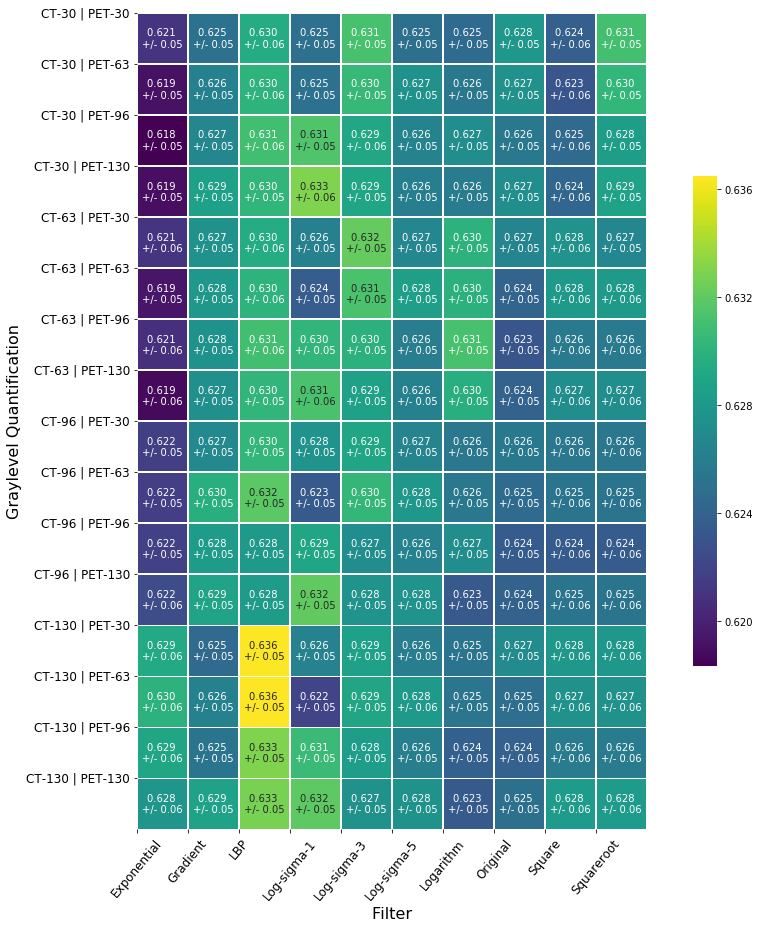

In [158]:
#filters = make_filter_labels()
bins = np.linspace(30, 130, 4, dtype=int)
discr_labels = []
for ct_bins in bins:
    for pet_bins in bins:
        discr_labels.append('CT-{} | PET-{}'.format(ct_bins, pet_bins))

matrix = 1.0 - avgs
        
plt.figure(figsize=(13, 13))
ax = sns.heatmap(
    matrix, 
    vmin=np.min(matrix),
    vmax=np.max(matrix),
    cmap=plt.cm.viridis,
    annot=True, fmt = '.3f', square=1, linewidth=.5, cbar=True,
    cbar_kws={'shrink': 0.6}, 
    #annot_kws={'size': 10}
)
plt.xlabel('Filter', fontsize=16)
plt.ylabel('Graylevel Quantification', fontsize=16)
plt.xticks(
    np.arange(ncols), filter_labels, 
    rotation='50', fontsize=12
)
plt.yticks(
    np.arange(nrows), discr_labels, rotation='0', fontsize=12,
    ha='right', va='center'
)
for num, value in enumerate(ax.texts): 
    value.set_text('{} \n+/- {}'.format(
            value.get_text(), np.round(stds.ravel()[num], decimals=2)
        )
    )
plt.tight_layout()
plt.savefig(
    './filter_and_discr.png',
    dpi=400, transparent=True
)

In [141]:
# Best filter: LBP
# Best discr combo: CT-130/PET-30, CT-130/PET-63

In [165]:
best_filter = ref_data_dirs['lbp']
best_result = 'ct3_pet1' #'ct3_pet2'

for ref_dset in sorted(best_filter.values()):
    if best_result in ref_dset:
        best_results = pd.read_csv(ref_dset, index_col=0)

best_results.head()

,avg_test_score,avg_train_score,best_features,best_params,experiment_id,model,num_features,selector
0,0.395160,0.395151,[ 3 4 5 6 7 8 9 13 14 15 19 ...,"{'n_components': 11, 'priors': [0.677, 0.323],...",684,LinearDiscriminantAnalysis,126,logregl1_permut_imp
1,0.352739,0.352727,[ 3 5 7 8 9 14 15 17 19 23 29 ...,"{'n_components': 34, 'priors': [0.677, 0.323],...",559,LinearDiscriminantAnalysis,123,logregl1_permut_imp
2,0.349425,0.349415,[ 3 5 7 8 9 13 14 15 17 18 19 ...,"{'n_components': 34, 'priors': [0.677, 0.323],...",629,LinearDiscriminantAnalysis,141,logregl1_permut_imp
3,0.363203,0.363193,[ 3 5 7 9 13 14 15 17 18 19 23 ...,"{'n_components': 11, 'priors': [0.677, 0.323],...",192,LinearDiscriminantAnalysis,131,logregl1_permut_imp
4,0.368506,0.368494,[ 3 4 7 8 9 13 14 17 23 29 39 ...,"{'n_components': 19, 'priors': [0.677, 0.323],...",835,LinearDiscriminantAnalysis,132,logregl1_permut_imp


## Optimal classifier and feature selector

In [187]:
path_to_data = './../../data/to_analysis/lbp/ct4_pet0_clinical.csv'
data = pd.read_csv(path_to_data, index_col=0)        
data.head()

,ct_original_shape_Volume,ct_original_shape_SurfaceArea,ct_original_shape_SurfaceVolumeRatio,ct_original_shape_Sphericity,ct_original_shape_Maximum3DDiameter,ct_original_shape_Maximum2DDiameterSlice,ct_original_shape_Maximum2DDiameterColumn,ct_original_shape_Maximum2DDiameterRow,ct_original_shape_Elongation,ct_original_shape_Flatness,...,cisplatin_5,cisplatin_6,cisplatin_7,stage_1,stage_2,stage_3,stage_4,suv_peak,mtv,tlg
2,17142.0,4860.055715,0.283517,0.661532,45.617979,42.720019,41.976184,44.598206,0.738882,0.723925,...,0,1,0,0,0,0,1,21.616549,7.384,124.870726
4,9661.0,3126.087371,0.323578,0.701721,38.704005,29.410882,38.587563,35.468296,0.796900,0.629917,...,1,0,0,0,0,0,1,15.296275,3.406,41.554406
5,16214.0,4063.633046,0.250625,0.762365,46.454279,32.015621,46.065171,43.011626,0.600926,0.535140,...,0,0,0,0,1,0,0,14.473272,7.934,86.228420
8,69354.0,15698.615155,0.226355,0.520001,83.438600,65.764732,74.148500,80.956779,0.784571,0.414247,...,0,0,0,0,0,0,1,10.510859,26.926,205.413389
10,10749.0,3658.448414,0.340352,0.643822,43.150898,33.015148,33.286634,38.013156,0.690320,0.539743,...,0,1,0,0,0,0,1,7.213190,6.041,32.103770


In [ ]:
# * New model comparison experiments
#   * Extend hparam space 
# * Training and validation curves of best model pair
# * Confusion matrix